# This project helps customers predict home price in Chennai

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('train-chennai-sale.csv')
dataset.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [4]:
dataset.shape

(7109, 22)

In [5]:
dataset.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

# Data Cleaning Starts

## Missing Value Handling

In [6]:
dataset['N_BATHROOM'].fillna(dataset['N_BATHROOM'].mode()[0],inplace=True)
dataset['N_BEDROOM'].fillna(dataset['N_BEDROOM'].mode()[0],inplace=True)
dataset.QS_OVERALL = dataset.QS_OVERALL.fillna(dataset.QS_OVERALL.mean())

In [7]:
dataset=dataset.drop_duplicates()

In [8]:
dataset.shape

(7109, 22)

In [9]:
dataset.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

### Deleting uncessary colums which is lead to wrong prediction

In [10]:
df=dataset.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)

In [11]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

## Changing correct data type

In [12]:
#df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'],format='%d-%m-%Y')
#df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'],format='%d-%m-%Y')
df['N_BEDROOM']=df['N_BEDROOM'].astype(int)
df['N_BATHROOM']=df['QS_BATHROOM'].astype(int)
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM          int32
N_BATHROOM         int32
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

### On analysis of this dataset, we find every categorical data column contains spelling mistakes

#### so we need correct them

In [13]:
print(df['AREA'].unique())

print(df['SALE_COND'].unique())

print(df['PARK_FACIL'].unique())

print(df['BUILDTYPE'].unique())

print(df['UTILITY_AVAIL'].unique())

print(df['STREET'].unique())

print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


## correcting the spelling mistakes

In [14]:
#df['AREA'].replace(['Karapakam'],'karapakkam',inplace=True)
df.loc[df["AREA"] == "Karapakam", "AREA"] = 'Karapakkam'

df.loc[df["AREA"] == "Ana Nagar", "AREA"] = 'Anna Nagar'

df.loc[df["AREA"] == "Adyr", "AREA"] = 'Adyar'

df.loc[df["AREA"] == "Ann Nagar", "AREA"] = 'Anna Nagar'

df.loc[df["AREA"] == "Chormpet", "AREA"] = 'Chrompet'

df.loc[df["AREA"] == "Chrompt", "AREA"] = 'Chrompet'

df.loc[df["AREA"] == "Chrmpet", "AREA"] = 'Chrompet'

df.loc[df["AREA"] == "KKNagar", "AREA"] = 'KK Nagar'

df.loc[df["AREA"] == "TNagar", "AREA"] = 'T Nagar'

df.loc[df["AREA"] == "Velchery", "AREA"] = 'Velachery'

df.loc[df["SALE_COND"] == 'Ab Normal', 'SALE_COND'] = 'AbNormal'

df.loc[df['SALE_COND']=='Partiall','SALE_COND']='Partial'

df.loc[df['SALE_COND']=='PartiaLl','SALE_COND']='Partial'

df.loc[df['SALE_COND']=='Adj Land','SALE_COND']='AdjLand'

df.loc[df['PARK_FACIL']=='Noo','PARK_FACIL']='No'

df.loc[df['BUILDTYPE']=='Other','BUILDTYPE']='Others'

df.loc[df['BUILDTYPE']=='Comercial','BUILDTYPE']='Commercial'

df.loc[df['UTILITY_AVAIL']=='AllPub','UTILITY_AVAIL']='All Pub'

df.loc[df['UTILITY_AVAIL']=='NoSeWa','UTILITY_AVAIL']='NoSewr'

df.loc[df['UTILITY_AVAIL']=='NoSewr ','UTILITY_AVAIL']='NoSewr'

#df['AREA'].replace(['NoSeWa'],'NoSewr ',inplace=True)

df.loc[df['STREET']=='Pavd','STREET']='Paved'

df.loc[df['STREET']=='NoAccess','STREET']='No Access'

In [15]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())


['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
['Yes' 'No']
['Commercial' 'Others' 'House']
['All Pub' 'ELO' 'NoSewr']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


## Creating AGE and SALE YEAR columns From Date of DATE_BUILD and DATE_SALE

In [16]:
y=df['DATE_BUILD'].str[6:]
ser = pd.Series(y)
year=pd.to_numeric(ser, downcast ='signed')
Age=2022-year

In [17]:
df['Age']=Age #Age column added to df

In [18]:
print(df['Age'].sort_values().unique())

[12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73]


In [19]:
SALE_YEAR=df['DATE_SALE'].str[6:]
SALE_YEAR.sort_values().unique()

array(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015'], dtype=object)

In [20]:
df['SALE_YEAR']=SALE_YEAR
df['SALE_YEAR']=df['SALE_YEAR'].astype(int)

In [21]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age,SALE_YEAR
0,Karapakkam,1004,04-05-2011,131,1,3,3,AbNormal,Yes,15-05-1967,...,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000,55,2011
1,Anna Nagar,1986,19-12-2006,26,2,4,5,AbNormal,No,22-12-1995,...,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,27,2006
2,Adyar,909,04-02-2012,70,1,3,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,30,2012
3,Velachery,1855,13-03-2010,14,3,3,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,34,2010
4,Karapakkam,1226,05-10-2009,84,1,2,3,AbNormal,Yes,13-10-1979,...,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250,43,2009


In [22]:
print(df['SALE_YEAR'].sort_values().unique())

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


In [23]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'Age',
       'SALE_YEAR'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

## EDA For Categorical

c:\users\sivashanmugavadivel\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALES_PRICE'>

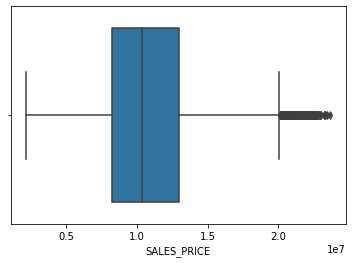

In [24]:
sns.boxplot(df['SALES_PRICE'])

c:\users\sivashanmugavadivel\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

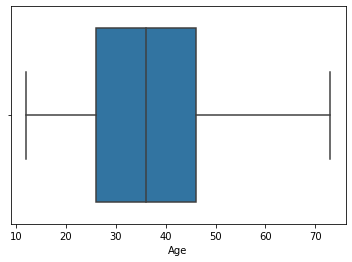

In [25]:
sns.boxplot(df['Age'])

### we doing nothing in outliars in this project

## Checking Relation between AREA AND SALES_PRICE

In [26]:
area_in_order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Karapakkam'),
  Text(1, 0, 'Adyar'),
  Text(2, 0, 'Chrompet'),
  Text(3, 0, 'Velachery'),
  Text(4, 0, 'KK Nagar'),
  Text(5, 0, 'Anna Nagar'),
  Text(6, 0, 'T Nagar')])

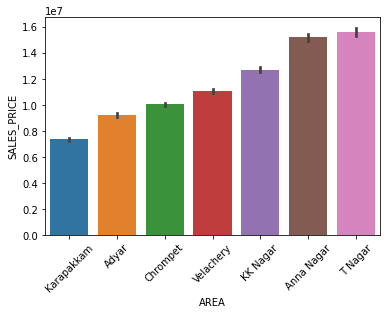

In [27]:
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=area_in_order)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='AREA'>

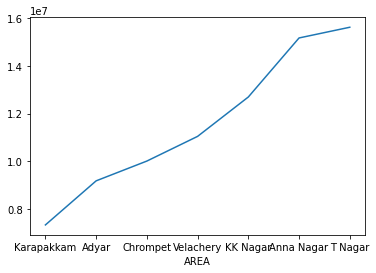

In [28]:
df.groupby('AREA')['SALES_PRICE'].mean().sort_values().plot()

### The above plots shows there is good linear relation between area and sales price


## Checking Relation between SALES SCOND AND SALES_PRICE

In [29]:
 area_in_order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Partial'),
  Text(1, 0, 'Family'),
  Text(2, 0, 'AbNormal'),
  Text(3, 0, 'Normal Sale'),
  Text(4, 0, 'AdjLand')])

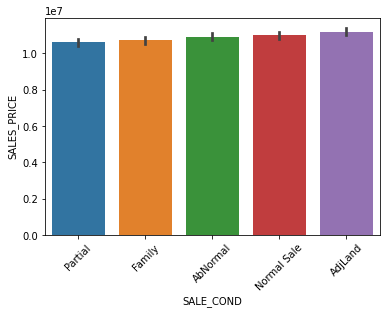

In [30]:
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order=area_in_order)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='SALE_COND'>

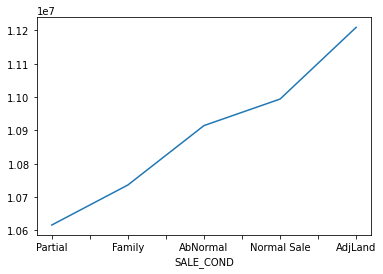

In [31]:
df.groupby('SALE_COND')['SALES_PRICE'].mean().sort_values().plot()

In [32]:
 buildtype_in_order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE']     

(array([0, 1, 2]),
 [Text(0, 0, 'House'), Text(1, 0, 'Others'), Text(2, 0, 'Commercial')])

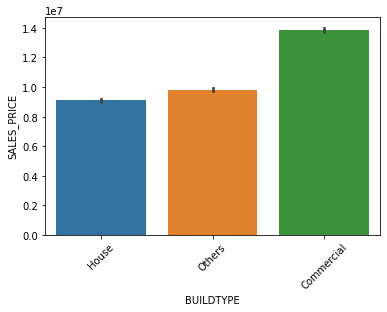

In [33]:
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=buildtype_in_order)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='BUILDTYPE'>

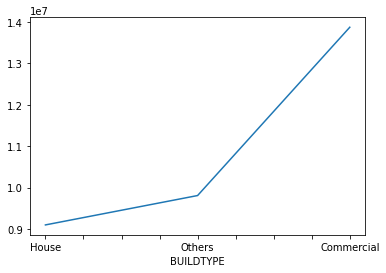

In [34]:
df.groupby('BUILDTYPE')['SALES_PRICE'].mean().sort_values().plot()

In [35]:
 utility_in_order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']   

(array([0, 1, 2]),
 [Text(0, 0, 'ELO'), Text(1, 0, 'NoSewr'), Text(2, 0, 'All Pub')])

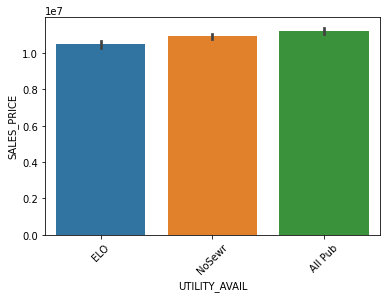

In [36]:
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=utility_in_order)
plt.xticks(rotation=45)


In [37]:
parkfacil_in_order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL']  

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

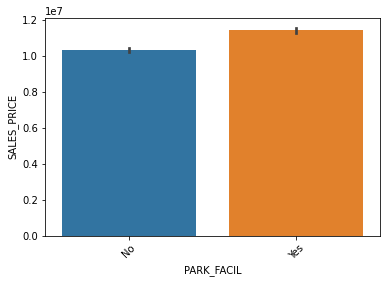

In [38]:
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df,order=parkfacil_in_order)
plt.xticks(rotation=45)


In [39]:
street_in_order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'] 

(array([0, 1, 2]),
 [Text(0, 0, 'No Access'), Text(1, 0, 'Paved'), Text(2, 0, 'Gravel')])

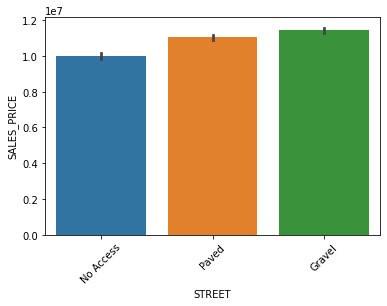

In [40]:
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=street_in_order)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='STREET'>

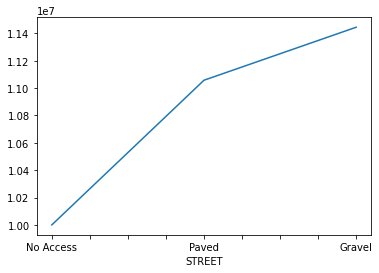

In [41]:
df.groupby('STREET')['SALES_PRICE'].mean().sort_values().plot()

In [42]:
mzone_in_order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'] 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'C'),
  Text(2, 0, 'I'),
  Text(3, 0, 'RH'),
  Text(4, 0, 'RL'),
  Text(5, 0, 'RM')])

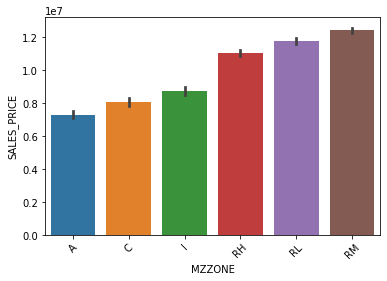

In [43]:
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=mzone_in_order)
plt.xticks(rotation=45)

In [44]:
n_bedrooms_in_order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'] 
n_bathroom_in_order=df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'] 
n_room_in_order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'] 



(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

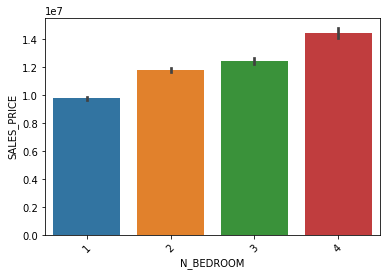

In [45]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df,order=n_bedrooms_in_order)
plt.xticks(rotation=45)


(array([0, 1, 2, 3]),
 [Text(0, 0, '5'), Text(1, 0, '4'), Text(2, 0, '2'), Text(3, 0, '3')])

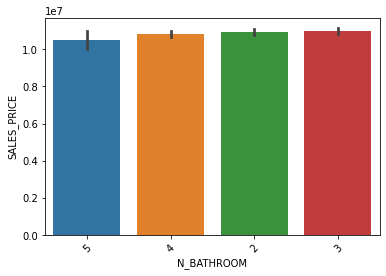

In [46]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df,order=n_bathroom_in_order)
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6')])

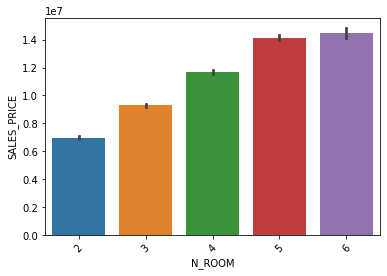

In [47]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df,order=n_room_in_order)
plt.xticks(rotation=45)

In [48]:
#sqft_in_order=df.groupby('INT_SQFT')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['INT_SQFT'] 


In [49]:
#sns.barplot(x='INT_SQFT',y='SALES_PRICE',data=df,order=sqft_in_order)
#plt.xticks(rotation=45)

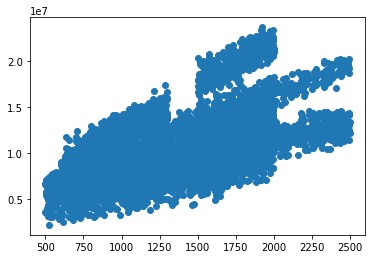

In [50]:
x=df['INT_SQFT']
y=df['SALES_PRICE']
plt.scatter(x, y)
plt.show()

<AxesSubplot:xlabel='INT_SQFT'>

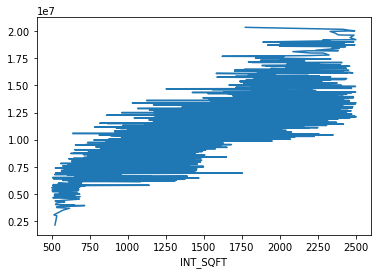

In [51]:
df.groupby('INT_SQFT')['SALES_PRICE'].mean().sort_values().plot()

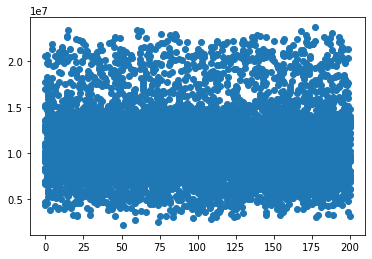

In [52]:
x=df['DIST_MAINROAD']
y=df['SALES_PRICE']
plt.scatter(x, y)
plt.show()

<AxesSubplot:xlabel='DIST_MAINROAD'>

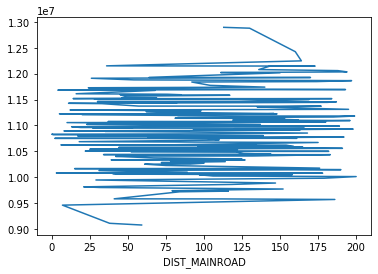

In [53]:
df.groupby('DIST_MAINROAD')['SALES_PRICE'].mean().sort_values().plot()


In [54]:
#According EDA There is no relarion between Dist mainroad and sales price so we can drop this feature

<AxesSubplot:xlabel='UTILITY_AVAIL'>

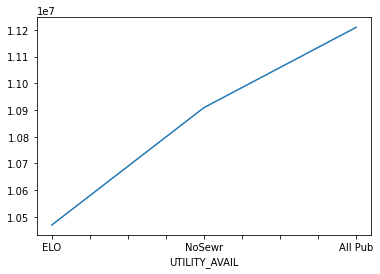

In [55]:
df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().sort_values().plot()

<AxesSubplot:xlabel='QS_ROOMS'>

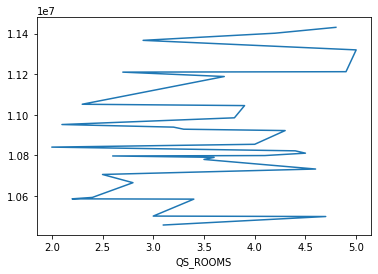

In [56]:
df.groupby('QS_ROOMS')['SALES_PRICE'].mean().sort_values().plot()

<AxesSubplot:xlabel='QS_BATHROOM'>

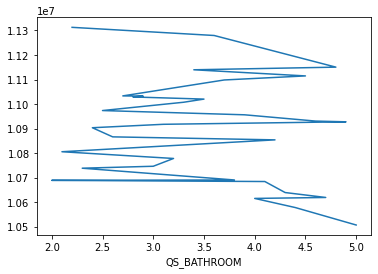

In [57]:
df.groupby('QS_BATHROOM')['SALES_PRICE'].mean().sort_values().plot()

<AxesSubplot:xlabel='QS_BEDROOM'>

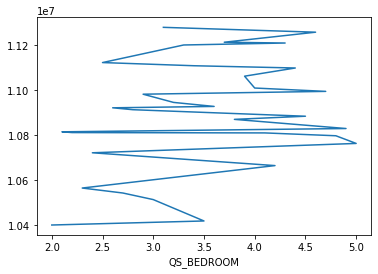

In [58]:
df.groupby('QS_BEDROOM')['SALES_PRICE'].mean().sort_values().plot()

<AxesSubplot:xlabel='QS_OVERALL'>

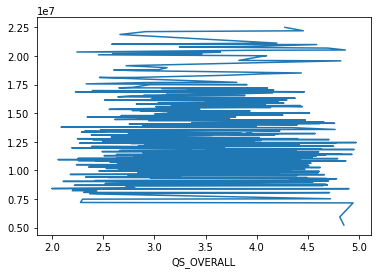

In [59]:
df.groupby('QS_OVERALL')['SALES_PRICE'].mean().sort_values().plot()

<AxesSubplot:xlabel='Age'>

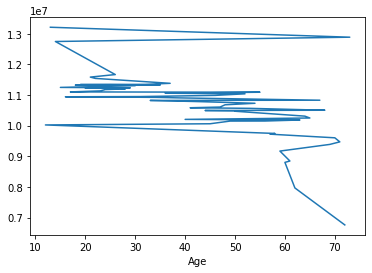

In [60]:
df.groupby('Age')['SALES_PRICE'].mean().sort_values().plot()

<AxesSubplot:xlabel='Age'>

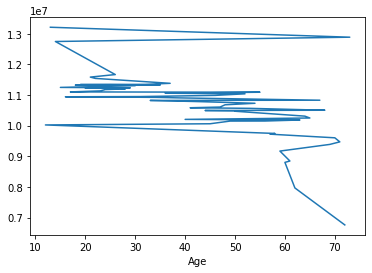

In [61]:
df.groupby('Age')['SALES_PRICE'].mean().sort_values().plot()

In [62]:
#x=df['SALE_YEAR']
#y=df['SALES_PRICE']
#plt.scatter(x, y)
#plt.show()

In [63]:
sales_year_in_order=df.groupby('SALE_YEAR')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_YEAR'] 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2009'),
  Text(3, 0, '2012'),
  Text(4, 0, '2005'),
  Text(5, 0, '2004'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2013'),
  Text(10, 0, '2014'),
  Text(11, 0, '2015')])

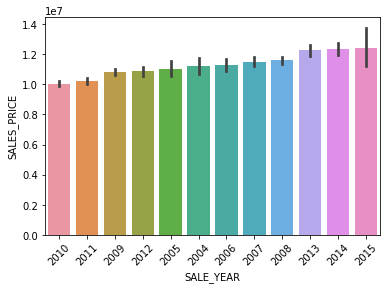

In [64]:
sns.barplot(x='SALE_YEAR',y='SALES_PRICE',data=df,order=sales_year_in_order)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='SALE_YEAR'>

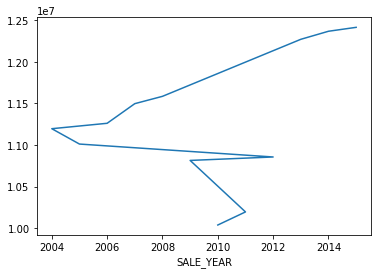

In [65]:
df.groupby('SALE_YEAR')['SALES_PRICE'].mean().sort_values().plot()

### According to EDA  :DATE_SALE,DATE_BUILD,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,
### QS_BEDROOM,QS_OVERALL,Age,SALE_YEAR there is no linear relationship with salesprice therefore we reject these features

# Encoding part starts from here 

### BUILDTYPE ,UTILITY_AVAIL need to be one hot encoding

#### According to EDA AREA,SALE_COND,PARK_FACIL,STREET,MZZONE columns need to be label encoding

In [66]:
df['AREA']=df['AREA'].map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6,})
df['AREA']

0       0
1       5
2       1
3       3
4       0
       ..
7104    0
7105    3
7106    3
7107    0
7108    3
Name: AREA, Length: 7109, dtype: int64

In [67]:
df['SALE_COND']=df['SALE_COND'].map({'Partial':0,'Family': 1,'AbNormal':2,'Normal Sale':3,'AdjLand':4})
df['SALE_COND']

0       2
1       2
2       2
3       1
4       2
       ..
7104    4
7105    1
7106    3
7107    0
7108    0
Name: SALE_COND, Length: 7109, dtype: int64

In [68]:
df['PARK_FACIL']=df['PARK_FACIL'].map({'Yes':1,'No':0})
df['PARK_FACIL']

0       1
1       0
2       1
3       0
4       1
       ..
7104    0
7105    1
7106    0
7107    1
7108    1
Name: PARK_FACIL, Length: 7109, dtype: int64

In [69]:
df['STREET']=df['STREET'].map({'Gravel':1,'No Access':0,'Paved':1})
df['STREET']

0       1
1       1
2       1
3       1
4       1
       ..
7104    0
7105    0
7106    1
7107    1
7108    1
Name: STREET, Length: 7109, dtype: int64

In [70]:
df['MZZONE']=df['MZZONE'].map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})
df['MZZONE']

0       0
1       4
2       5
3       2
4       1
       ..
7104    6
7105    4
7106    2
7107    5
7108    2
Name: MZZONE, Length: 7109, dtype: int64

In [71]:

df = pd.get_dummies(df, columns = ['BUILDTYPE', 'UTILITY_AVAIL'])
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,QS_OVERALL,SALES_PRICE,Age,SALE_YEAR,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_All Pub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSewr
0,0,1004,04-05-2011,131,1,3,3,2,1,15-05-1967,...,4.330,7600000,55,2011,1,0,0,1,0,0
1,5,1986,19-12-2006,26,2,4,5,2,0,22-12-1995,...,3.765,21717770,27,2006,1,0,0,1,0,0
2,1,909,04-02-2012,70,1,3,3,2,1,09-02-1992,...,3.090,13159200,30,2012,1,0,0,0,1,0
3,3,1855,13-03-2010,14,3,3,5,1,0,18-03-1988,...,4.010,9630290,34,2010,0,0,1,0,0,1
4,0,1226,05-10-2009,84,1,2,3,2,1,13-10-1979,...,3.290,7406250,43,2009,0,0,1,1,0,0


In [72]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'Age', 'SALE_YEAR', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others', 'UTILITY_AVAIL_All Pub',
       'UTILITY_AVAIL_ELO', 'UTILITY_AVAIL_NoSewr'],
      dtype='object')

In [73]:
X=df[['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','STREET','MZZONE','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others','UTILITY_AVAIL_All Pub','UTILITY_AVAIL_ELO','UTILITY_AVAIL_NoSewr']]
X.shape

(7109, 15)

In [74]:
X.isnull().sum()

AREA                     0
INT_SQFT                 0
N_BEDROOM                0
N_BATHROOM               0
N_ROOM                   0
SALE_COND                0
PARK_FACIL               0
STREET                   0
MZZONE                   0
BUILDTYPE_Commercial     0
BUILDTYPE_House          0
BUILDTYPE_Others         0
UTILITY_AVAIL_All Pub    0
UTILITY_AVAIL_ELO        0
UTILITY_AVAIL_NoSewr     0
dtype: int64

In [75]:
X.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,STREET,MZZONE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_All Pub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSewr
0,0,1004,1,3,3,2,1,1,0,1,0,0,1,0,0
1,5,1986,2,4,5,2,0,1,4,1,0,0,1,0,0
2,1,909,1,3,3,2,1,1,5,1,0,0,0,1,0
3,3,1855,3,3,5,1,0,1,2,0,0,1,0,0,1
4,0,1226,1,2,3,2,1,1,1,0,0,1,1,0,0


In [76]:
y=df['SALES_PRICE']

# Splitting the DATA

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=8)

### Scaling the DATA

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ML MODELS

# Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
regressor.fit(X_train, y_train)

LinearRegression()

In [80]:
print(regressor.intercept_) # c

10932878.228368744


In [81]:
coeff_df=pd.DataFrame(regressor.coef_,['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','STREET','MZZONE','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others','UTILITY_AVAIL_All Pub','UTILITY_AVAIL_ELO','UTILITY_AVAIL_NoSewr'], columns=['Coefficient'])
coeff_df

,Coefficient
AREA,9.901656e+05
INT_SQFT,6.865188e+05
N_BEDROOM,-1.207748e+06
N_BATHROOM,4.328102e+03
N_ROOM,1.791339e+06
SALE_COND,2.129051e+05
PARK_FACIL,5.047628e+05
STREET,3.435473e+05
MZZONE,8.997798e+05
BUILDTYPE_Commercial,3.889279e+18


In [82]:
y_pred = regressor.predict(X_test) 

In [83]:
ldf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Error': y_pred - y_test})
ldf

,Actual,Predicted,Error
3517,12544800,1.250165e+07,-4.315377e+04
2663,11244250,1.255080e+07,1.306548e+06
5650,13081220,1.351745e+07,4.362342e+05
4354,10455360,1.158005e+07,1.124686e+06
4835,9786000,9.507470e+06,-2.785298e+05
...,...,...,...
2957,7596170,8.249998e+06,6.538282e+05
1769,12807300,1.253851e+07,-2.687898e+05
2129,8925160,1.068712e+07,1.761958e+06
6758,9896880,1.081000e+07,9.131182e+05


In [84]:
from sklearn import metrics
print('Linear Regression R2- SCORE:', metrics.r2_score(y_test,y_pred))

Linear Regression R2- SCORE: 0.9121621004072995


# KNN Regression MODEL

In [85]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()

knn_model.fit(X_train,y_train)
# Predictions
knnpreds = knn_model.predict(X_test)

# Performance
performance = pd.DataFrame({ 'Actual': y_test,
                            'Predicted': knnpreds,
                            'Error': y_test - knnpreds})
# View
performance

,Actual,Predicted,Error
3517,12544800,11830578.0,714222.0
2663,11244250,11551020.0,-306770.0
5650,13081220,11547026.0,1534194.0
4354,10455360,10780664.0,-325304.0
4835,9786000,10130702.0,-344702.0
...,...,...,...
2957,7596170,8923827.0,-1327657.0
1769,12807300,11154500.0,1652800.0
2129,8925160,8917220.0,7940.0
6758,9896880,10259430.0,-362550.0


### CROSS VALIDATION SCORE FOR KNN MODEL

In [86]:
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsRegressor(i) #initialising the model
    knn.fit(X_train,y_train) # training the model
    print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " test score : ", knn.score(X_test,y_test) , " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10))) #predicting using the model


K value  :  1  train score :  0.9999974179558855  test score :  0.9058181034502278  score :  0.8993084307744764
K value  :  2  train score :  0.9759842981680112  test score :  0.9230907012778274  score :  0.9200587519616821
K value  :  3  train score :  0.965811214601573  test score :  0.9261174356337402  score :  0.9245616102929967
K value  :  4  train score :  0.958659362527833  test score :  0.9246178023491257  score :  0.9235804665028471
K value  :  5  train score :  0.9527605469827862  test score :  0.9233036406815367  score :  0.9211140744725608
K value  :  6  train score :  0.9477384121320283  test score :  0.9210911173019554  score :  0.9189647066866392
K value  :  7  train score :  0.9432036992867656  test score :  0.9188088735772748  score :  0.9178438841625625
K value  :  8  train score :  0.9395353336762708  test score :  0.9170757284227983  score :  0.9153642569846783
K value  :  9  train score :  0.9364127689453923  test score :  0.9151830047801599  score :  0.91269559181

In [111]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=4).fit(X_train, y_train)

# Score
score_knn = knn_model.score(X_test, y_test)

print('According to cross validation score Best KNN model :k=4')
print(score_knn)

According to cross validation score Best KNN model :k=4
0.9246178023491257


### Feature Selection using Decision Tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 6)
# Fit dt to the training set
dt.fit(X_train, y_train)
importance = dt.feature_importances_
importance

array([0.01648459, 0.29492468, 0.        , 0.10066755, 0.        ,
       0.11507551, 0.03294426, 0.05934872, 0.11447493, 0.06891674,
       0.06557135, 0.03237203, 0.01618602, 0.03237203, 0.05066158])

In [89]:
idf=pd.DataFrame(importance,['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','STREET','MZZONE','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others','UTILITY_AVAIL_All Pub','UTILITY_AVAIL_ELO','UTILITY_AVAIL_NoSewr'], columns=['IMPORTANCE'])
idf

,IMPORTANCE
AREA,0.016485
INT_SQFT,0.294925
N_BEDROOM,0.000000
N_BATHROOM,0.100668
N_ROOM,0.000000
SALE_COND,0.115076
PARK_FACIL,0.032944
STREET,0.059349
MZZONE,0.114475
BUILDTYPE_Commercial,0.068917


# PREDICTION USING DECISION TREE REGRESSOR

In [102]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor()

# Fit dt to the training set
dt.fit(X_train, y_train)
dy_pred=dt.predict(X_test)
dy_pred

array([12564470., 11377000., 13797670., ...,  9808360.,  9225240.,
       13177330.])

In [103]:
performance = pd.DataFrame({ 'Actual': y_test,
                            'Predicted': dy_pred,
                            'Error': dy_pred - y_test})
# View
performance

,Actual,Predicted,Error
3517,12544800,12564470.0,19670.0
2663,11244250,11377000.0,132750.0
5650,13081220,13797670.0,716450.0
4354,10455360,10630800.0,175440.0
4835,9786000,8899375.0,-886625.0
...,...,...,...
2957,7596170,8027540.0,431370.0
1769,12807300,12415500.0,-391800.0
2129,8925160,9808360.0,883200.0
6758,9896880,9225240.0,-671640.0


In [104]:
from sklearn.metrics import  r2_score

# Compute y_pred
dy_pred = dt.predict(X_test)

# Compute mse_dt
rsquared = r2_score(y_test,dy_pred)
# Compute rmse_dt
print('r2_score of decision regressor :',rsquared)

# Print rmse_dt
#print("Test set R2 of dt: {:.2f}".format(rsquared))

r2_score of decision regressor : 0.9689949724302425


### CROSS VALIDATION SCORE FOR DECISION TREE

In [112]:
from sklearn.model_selection import cross_val_score 
import numpy as np
for depth in [1,2,3,4,5,6,7,8,9,10,20,50,75,100]:
    dt = DecisionTreeRegressor(max_depth=depth) 
    dt.fit(X_train, y_train)
    trainAccuracy = r2_score(y_train, dt.predict(X_train)) 
  
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.36667751923415304  Cross val score :  0.36538307695712074
Depth  :  2  Training Accuracy :  0.688429451825878  Cross val score :  0.6862693135848129
Depth  :  3  Training Accuracy :  0.8051473854519272  Cross val score :  0.8007991811263985
Depth  :  4  Training Accuracy :  0.88963418857153  Cross val score :  0.8846430091817611
Depth  :  5  Training Accuracy :  0.92337750068526  Cross val score :  0.9154751535476493
Depth  :  6  Training Accuracy :  0.9445782248849857  Cross val score :  0.9352561153243272
Depth  :  7  Training Accuracy :  0.959789694531038  Cross val score :  0.9491723486842332
Depth  :  8  Training Accuracy :  0.972180730057831  Cross val score :  0.9588263762021956
Depth  :  9  Training Accuracy :  0.981450275443571  Cross val score :  0.964767285496392
Depth  :  10  Training Accuracy :  0.9888614298869515  Cross val score :  0.9683197359522893
Depth  :  20  Training Accuracy :  0.9999985387279854  Cross val score :  0.9663726009

## PREDICTION USING USING RANDOM FOREST REGRESSOR

In [93]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 10)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=1000, random_state=10)

In [94]:
rf_pred=regressor.predict(X_test)
rf_pred

array([12156760.38, 11692093.5 , 13531765.89, ...,  9276565.98,
        9542278.26, 13148684.42])

In [95]:
decisiontree_prediction=pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred,'Diffrence':rf_pred-y_test})
decisiontree_prediction

,Actual,Predicted,Diffrence
3517,12544800,1.215676e+07,-388039.620
2663,11244250,1.169209e+07,447843.500
5650,13081220,1.353177e+07,450545.890
4354,10455360,1.077706e+07,321696.360
4835,9786000,8.677276e+06,-1108723.625
...,...,...,...
2957,7596170,8.004571e+06,408400.905
1769,12807300,1.274667e+07,-60630.750
2129,8925160,9.276566e+06,351405.980
6758,9896880,9.542278e+06,-354601.740


In [96]:
rfscore = r2_score(y_test,rf_pred)
# Compute rmse_dtrfscore
print('r2_score of decision regressor :',rfscore)

r2_score of decision regressor : 0.9848664072052774


# PREDICTION USING XGBRegressor

In [97]:
import xgboost as xg

from sklearn.metrics import mean_squared_error as MSE
  

xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 1000, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
xgpred = xgb_r.predict(X_test)
  
xgbooster_prediction=pd.DataFrame({'Actual': y_test, 'Predicted': xgpred,'Diffrence':xgpred-y_test})
xgbooster_prediction


[09:53:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


,Actual,Predicted,Diffrence
3517,12544800,12379464.0,-165336.0
2663,11244250,11557720.0,313470.0
5650,13081220,13218829.0,137609.0
4354,10455360,10813779.0,358419.0
4835,9786000,9245805.0,-540195.0
...,...,...,...
2957,7596170,7405360.5,-190809.5
1769,12807300,13030438.0,223138.0
2129,8925160,9195015.0,269855.0
6758,9896880,9221970.0,-674910.0


In [113]:
xgscore = r2_score(y_test,xgpred)
# Compute rmse_dtrfscore
print('r2_score of decision regressor :',xgscore)

r2_score of decision regressor : 0.9871967488132266
